##편향(bias): 주어진 학습데이터를 얼마나 잘 학습했는가
주어진 학습데이터를 잘 학습했다면 편향이 낮다고 한다. 


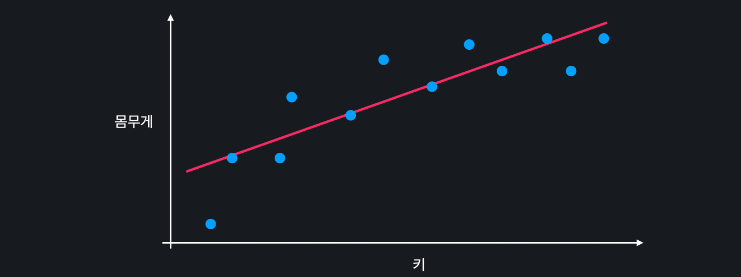

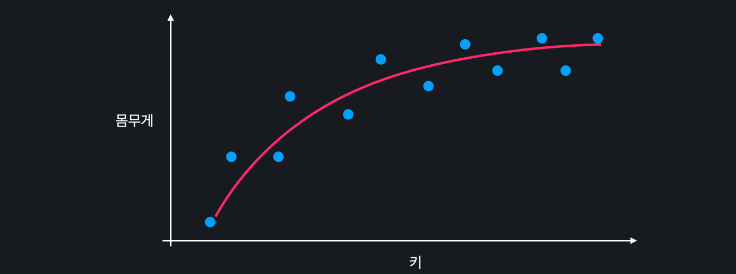

처음에 본 직선 모델의 문제는 모델이 너무 간단해서 아무리 학습을 해도 위와 같은 곡선 관계를 나타내지 못한다는 것입니다. 모델에 한계가 있는 거죠. 모델이 너무 간단해서 데이터의 관계를 잘 학습하지 못하는 경우 모델의 편향, 영어로는 bias가 높다고 합니다.모델이 training 데이터에 과소적합(underfit) 됐다고 생각하시면 됩니다.

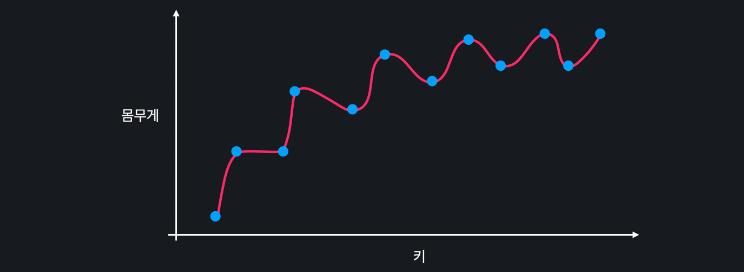

이번에는 높은 차항의 회귀를 사용해서, 위와 같은 관계를 학습했다고 할게요. 이 복잡한 곡선은 training 데이터에 거의 완벽히 맞춰져 있습니다. 모델의 복잡도를 늘려서 training 데이터의 관계를 잘 학습할 수 있도록 한 거죠. 따라서 이 모델은 편향이 낮은 모델이라고 할 수 있습니다.모델이 training 데이터에 과적합(overfit) 된 거죠.

##분산 :데이터 셋마다의 성능 차이
데이터셋마다 성능차이가 크면 분산이 높다고 한다. 

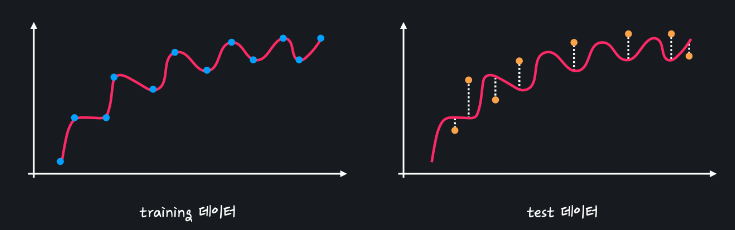

이 모델은 training 데이터에 대해서는 거의 완벽한 성능을 보이지만 test 데이터에 대해서는 상당히 안 좋은 성능을 보입니다. 모델이 오히려 너무 복잡해서 문제가 생기는데요. 모델이 training 데이터를 가지고 학습할 때 키와 몸무게의 관계를 배우기보다는 아예 데이터 자체를 외워버리기 때문에 처음 보는 데이터 셋에 모델을 적용해 보면 성능이 아주 떨어지는 겁니다.

데이터 셋 별로 모델이 얼마나 일관된 성능을 보여주는지를 분산, 영어로는 variance라고 합니다. 다양한 데이터 셋 간에 성능 차이가 많이 나면 분산이 높다고 하고, 성능이 비슷하면 분산이 낮다고 합니다. 복잡한 곡선 모델은 데이터 셋마다 성능 차이가 많이 나니까 분산이 높은 거죠.

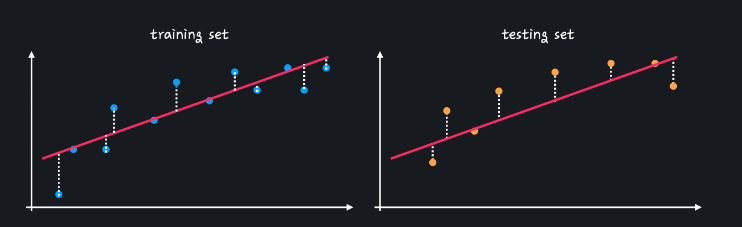

training set을 사용했을 때랑, test set을 사용했을 때 성능에 큰 차이가 없습니다. 다양한 데이터 셋을 사용해도 일관된 성능을 보인다는 건데요. 따라서 직선 모델은 분산이 작습니다.

##편향-분산 트레이드오프 (Bias-Variance Tradeoff)
이미 눈치채셨을 수도 있는데요. 일반적으로 편향과 분산은 하나가 줄어들수록 다른 하나는 늘어나는 관계가 있습니다. 둘 중 하나를 줄이기 위해서는 다른 하나를 포기해야 된다는 말인데요. 그렇기 때문에 이 관계를 편향-분산 트레이드오프라고 부릅니다.

편향-분산 트레이드오프 문제는 머신 러닝 프로그램들의 성능과 밀접한 관계가 있기 때문에 편향과 분산, 다르게는 과소적합과 과적합의 적당한 밸런스를 찾아내는 게 중요합니다.

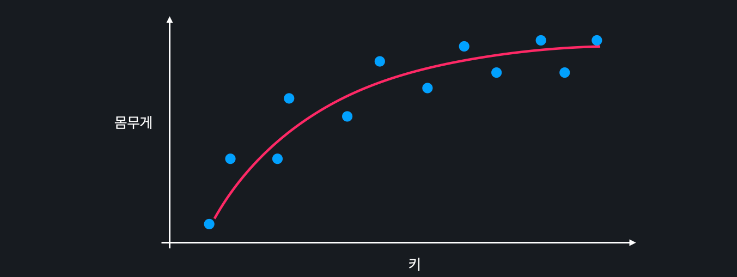

이런 딱 적당한 곡선을 찾아야 한다는 거죠.

##복잡한 모델(다항회귀) -> 과적합 발생 예시 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn import preprocessing 

from math import sqrt 

import numpy as np 
import pandas as pd 

In [ ]:
admission_df = pd.read_csv('admission_data.csv').drop('Serial No.',axis = 1) #안쓰기 때문에 삭제 

In [ ]:
admission_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
X = admission_df.drop(['Chance of Admit '], axis = 1)

polynomial_transformer = preprocessing.PolynomialFeatures(6) #6차항 변형기 정의 
Polynomial_features = polynomial_transformer.fit_transform(X.values)  #데이터를 value들을 6차항으로 변환 
features = polynomial_transformer.get_feature_names_out (X.columns) #데이터의 feature들을 6차항으로 변환 

X = pd.DataFrame(Polynomial_features,columns = features)
X.head() #입력변수를 6차항으로 변한한것을 볼 수 있다. 

,1,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,GRE Score^2,GRE Score TOEFL Score,...,LOR CGPA^2 Research^3,LOR CGPA Research^4,LOR Research^5,CGPA^6,CGPA^5 Research,CGPA^4 Research^2,CGPA^3 Research^3,CGPA^2 Research^4,CGPA Research^5,Research^6
0,1.0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,113569.0,39766.0,...,419.05125,43.425,4.5,807539.696082,83682.870060,8671.800006,898.632125,93.1225,9.65,1.0
1,1.0,324.0,107.0,4.0,4.0,4.5,8.87,1.0,104976.0,34668.0,...,354.04605,39.915,4.5,487014.306256,54905.784245,6190.054594,697.864103,78.6769,8.87,1.0
2,1.0,316.0,104.0,3.0,3.0,3.5,8.00,1.0,99856.0,32864.0,...,224.00000,28.000,3.5,262144.000000,32768.000000,4096.000000,512.000000,64.0000,8.00,1.0
3,1.0,322.0,110.0,3.0,3.5,2.5,8.67,1.0,103684.0,35420.0,...,187.92225,21.675,2.5,424731.610940,48988.651781,5650.363527,651.714363,75.1689,8.67,1.0
4,1.0,314.0,103.0,2.0,2.0,3.0,8.21,0.0,98596.0,32342.0,...,0.00000,0.000,0.0,306237.903347,0.000000,0.000000,0.000000,0.0000,0.00,0.0


In [ ]:
y = admission_df[['Chance of Admit ']]
y.head()

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.3, random_state= 5)

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_train, y_train_predict)

print("training set에서의 성능")
print("-----------------------")
print(sqrt(mse))

mse = mean_squared_error(y_test,y_test_predict)
print("test set에서의 성능")
print("-----------------------")
print(sqrt(mse))

training set에서의 성능
-----------------------
0.0015048339805630803
test set에서의 성능
-----------------------
5.090669200655709


L1정규화 :Lasso

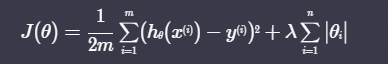

L2정규화 :Ridge

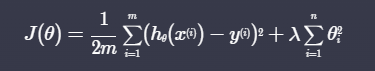

L1정규화를 이용한 과적합 방지 

In [4]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import PolynomialFeatures
from math import sqrt 

import numpy as np 
import pandas as pd 

insurance_df = pd.read_csv("insurance.csv")

#전체 데이터 셋중에서 필요한 열들만 one_hot 인코딩을 해준다. pd.get_dummies(data = 데이터, columns = ['열'])
#나머지는 데이터들은 가만히 있다. 
insurance_df = pd.get_dummies(data = insurance_df, columns= ['sex','smoker','region'])

#데이터 -> df
#목적변수인 charges를 제외 df.drop(['변수'],axis = 1)
X = insurance_df.drop(['charges'],axis = 1)

#다항 변형기 정의 -> PolynomialFeatures
polynomial_transformer = PolynomialFeatures(4) 

#X의 value들을 다항변형기를 이용하여 다항 데이터로 변형 -> 다항기.fit_transform(X.values)
polynomial_features = polynomial_transformer.fit_transform(X.values)

#X의 feature들을 다항변형기를 이용하여 다항feature들로 변환 -> 다항기.get_feature_names_out(X.columns)
features = polynomial_transformer.get_feature_names_out(X.columns)

X = pd.DataFrame(polynomial_features,columns= features)
y =insurance_df[['charges']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.3,random_state=5)

#L1인 Lasso 모델 사용 , 람다는 1 , 반복수 , min_max_normalization 여부 
#Lasso(alpha = 숫자, max_iter = 숫자, normalize = True or False)
model = Lasso(alpha = 1, max_iter = 2000, normalize=True)

model.fit(X_train,y_train)
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

mse = mean_squared_error(y_train,y_train_predict)
print("training set에서 성능")
print("-----------------------")
print(f'오차: {sqrt(mse)}')

mse = mean_squared_error(y_test, y_test_predict)

print("testing set에서 성능")
print("-----------------------")
print(f'오차: {sqrt(mse)}')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


training set에서 성능
-----------------------
오차: 4726.636439607449
testing set에서 성능
-----------------------
오차: 4692.232442526968


In [5]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from math import sqrt 

import numpy as np 
import pandas as pd 

insurance_df = pd.read_csv('insurance.csv')
insurance_df = pd.get_dummies(data = insurance_df, columns = ['sex','smoker','region'])

X = insurance_df.drop(['charges'], axis = 1)

polynomial_transformer = PolynomialFeatures(4)
polynomial_features = polynomial_transformer.fit_transform(X.values)

features = polynomial_transformer.get_feature_names_out(X.columns)

X =pd.DataFrame(polynomial_features, columns= features)
y = insurance_df[['charges']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.3,random_state= 5)
model = Ridge(alpha = 0.01, max_iter = 2000, normalize = True)
model.fit(X_train,y_train)
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

mse = mean_squared_error(y_train,y_train_predict)
print("training set에서 성능")
print("-----------------------")
print(f'오차: {sqrt(mse)}')

mse = mean_squared_error(y_test,y_test_predict)
print("training set에서 성능")
print("-----------------------")
print(f'오차: {sqrt(mse)}')

training set에서 성능
-----------------------
오차: 4561.665097523861
training set에서 성능
-----------------------
오차: 4692.427560339697


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


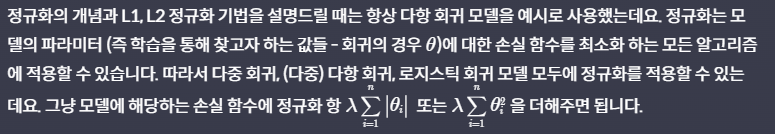

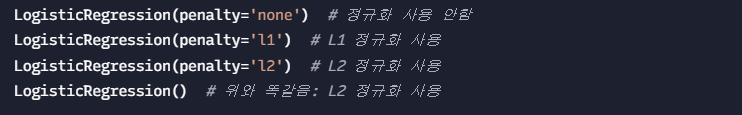

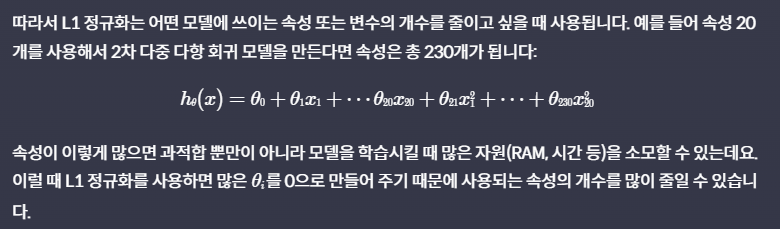

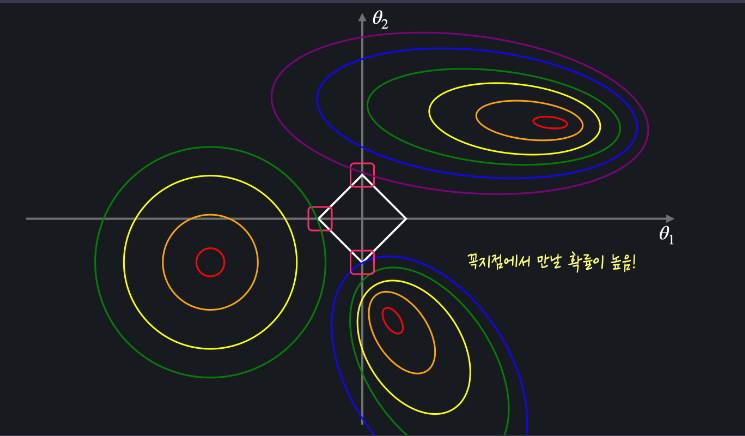

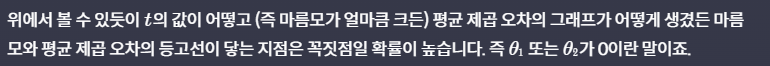

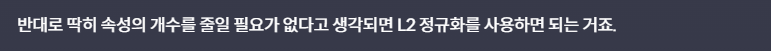

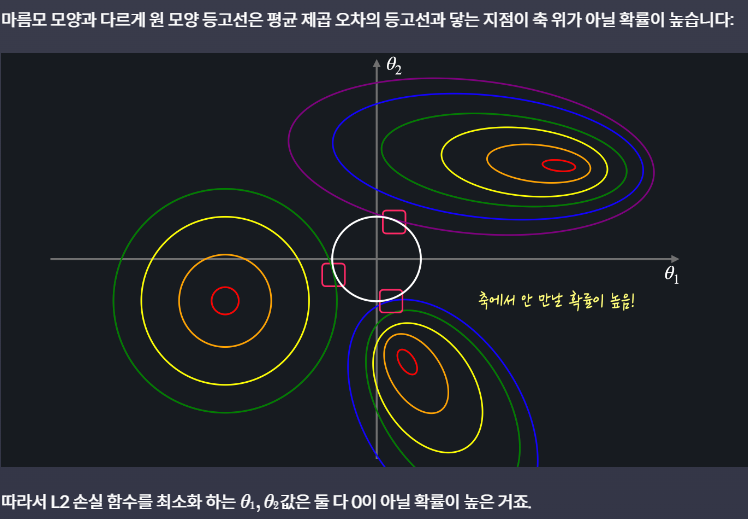

#K_겹 교차 검증부터는 train_test_split을 사용하지 않는다.
